<a href="https://colab.research.google.com/github/capGoblin/HelloWorld_ML_Models/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3


# train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# train_data_gen before augmentation
# train_data_gen = train_image_generator.flow_from_directory(
#     batch_size=batch_size,
#     directory=train_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='binary'
# )

# train_data_gen = tf.keras.utils.image_dataset_from_directory(
#   train_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=batch_size)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# val_data_gen = tf.keras.utils.image_dataset_from_directory(
#   validation_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=batch_size)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=os.path.dirname(test_dir),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False
)

# test_data_gen = tf.keras.utils.image_dataset_from_directory(
#   test_dir,
#   subset="validation",
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=batch_size)

Found 1000 images belonging to 2 classes.
Found 3050 images belonging to 3 classes.


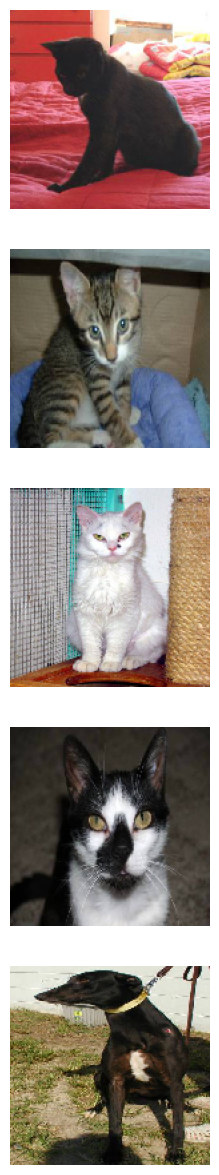

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# # 5

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


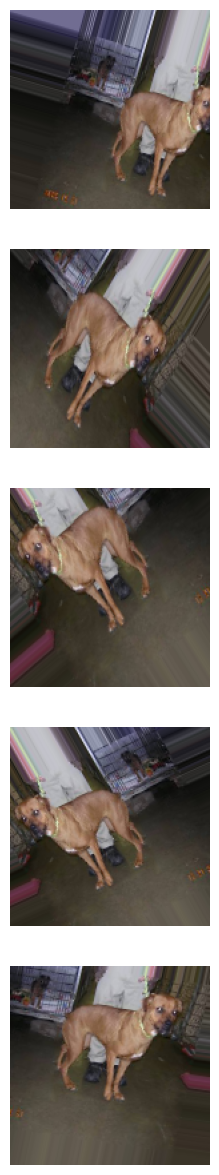

In [ ]:
# 6

from tensorflow import keras
from tensorflow.keras import layers


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

# data_augmentation in docs
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(IMG_HEIGHT,
#                                   IMG_WIDTH,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )

In [ ]:
# 7

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(32, (3, 3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential() #making our CNN
# model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(rate = 0.3))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(rate = 0.2))
# model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(rate = 0.15))
# model.add(Flatten())
# model.add(Dense(units = 32, activation = 'relu'))
# model.add(Dropout(rate = 0.15))
# model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dropout(rate = 0.1))
# model.add(Dense(units = 1), activation = 'sigmoid'))
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# data_augmentation in docs
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#   layers.MaxPooling2D(),
#   layers.Conv2D(256, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(512, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   # layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(1, activation='sigmoid')
# ])
# Step 7: Create the model architecture


model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 64)      

In [ ]:


# Step 8: Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

# history = model.fit(
#   train_data_gen,
#   validation_data=val_data_gen,
#   epochs=epochs
# )

Epoch 1/15
15/15 [==============================] - 32s 1s/step - loss: 0.8449 - accuracy: 0.5101 - val_loss: 0.6867 - val_accuracy: 0.5290
Epoch 2/15
15/15 [==============================] - 19s 1s/step - loss: 0.6889 - accuracy: 0.5465 - val_loss: 0.6694 - val_accuracy: 0.6205
Epoch 3/15
15/15 [==============================] - 21s 1s/step - loss: 0.6716 - accuracy: 0.5786 - val_loss: 0.6337 - val_accuracy: 0.6194
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6688 - accuracy: 0.5903 - val_loss: 0.6633 - val_accuracy: 0.5368
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.6611 - accuracy: 0.5994 - val_loss: 0.6337 - val_accuracy: 0.6417
Epoch 6/15
15/15 [==============================] - 20s 1s/step - loss: 0.6366 - accuracy: 0.6282 - val_loss: 0.6133 - val_accuracy: 0.6685
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.6385 - accuracy: 0.6084 - val_loss: 0.6289 - val_accuracy: 0.6027
Epoch 8/15
15/15 [==

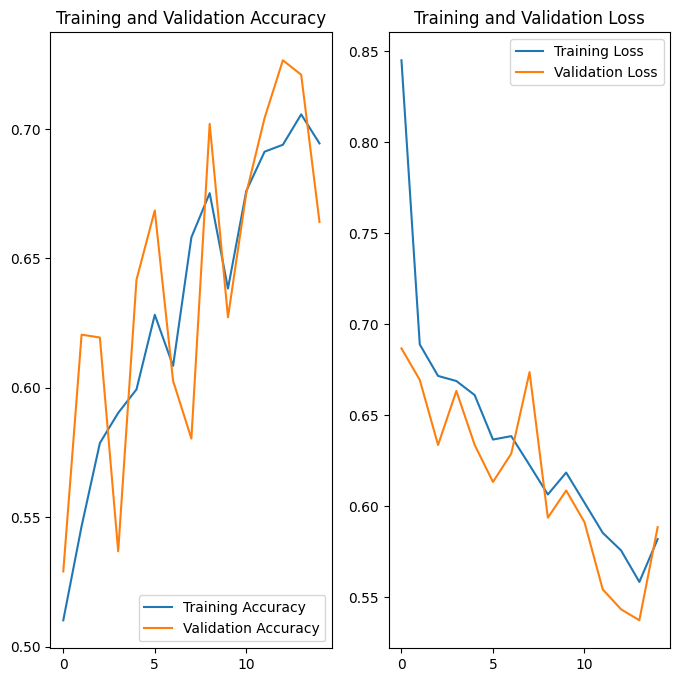

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

# import cv2
# import numpy as np


# Step 10: Predict and plot test images
# probabilities = model.predict(test_data_gen, steps=50)
# plotImages(test_data_gen[0][0][:50], probabilities[:50])
predictions = model.predict(test_data_gen, steps=50)
probabilities = []
for pred in predictions:
    if pred >= 0.5:
        probabilities.append(1)  # Dog
    else:
        probabilities.append(0)  # Cat

plotImages(test_data_gen[0][0][:50], probabilities)

# probabilities = model.predict(test_data_gen, steps=50)
# predictions = []
# for prob in probabilities:
#     if prob >= 0.5:
#         predictions.append(1)  # Dog
#     else:
#         predictions.append(0)  # Cat

# plotImages(test_data_gen[0][0][:50], predictions)


# Specify the path to the file containing images
# file_path = 'path_to_file/my_images.jpg'
# os.listdir(test_dir)
# Read the image file
# image = cv2.imread(test_dir)

# # Convert the image to a NumPy array
# image_array = np.array(image)

# import os
# import cv2
# import numpy as np

# image_list = []
# target_shape = (IMG_WIDTH, IMG_HEIGHT)
# for filename in os.listdir(test_dir):
#     if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
#         image_path = os.path.join(test_dir, filename)
#         image = cv2.imread(image_path)
#         if image is not None:
#             # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             resized_image = cv2.resize(image, target_shape)
#             image_list.append(resized_image)

# images_array = np.array(image_list)
# images_tensor = tf.convert_to_tensor(images_array)

# predictions = model.predict(test_data_gen)
# probabilities = []

# for prediction in predictions:
#     if prediction > 0.5:
#         probabilities.append(1)
#     else:
#         probabilities.append(0)


# probabilities = model.predict(images_tensor)
# probabilities = np.round(probabilities.flatten())

In [ ]:
probabilities

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
